# Importar las librerías a utilizar

In [394]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import os


In [397]:
df = pd.read_csv(os.path.join(DATA_DIR,"data_ecu.txt"),delim_whitespace=True)
df.head()

,Longitude,Latitude
0,-80.43876447751417,"-0,9519244059855368"
1,-80.42499386576185,"-0,7890541493993685"
2,-78.4154028108096,"-0,0191854793665598"
3,-79.91790871558031,"-2,1991032880049435"
4,-80.48995382890078,"-0,496245130223165"


In [398]:
df.dtypes

Longitude    object
Latitude     object
dtype: object

In [399]:
df.describe()

,Longitude,Latitude
count,305,290
unique,298,288
top,error,"999,0"
freq,3,3


# AED


# Verificar valores faltantes


In [400]:
df.isnull().sum()


Longitude     0
Latitude     15
dtype: int64

# Verificar si hay duplicados


In [401]:
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())



Número de filas duplicadas:
7


# Resolver valores faltantes y duplicados

In [402]:
df.value_counts()

Longitude           Latitude           
error               999,0                  3
-78.39704089477075  -0,0578544460543432    1
-79.96131215663695  -2,1566645077691304    1
-79.95605510707483  -2,123089855495745     1
-79.95491044967635  -2,226476845818889     1
                                          ..
-78.59815593129615  -0,1680620461632256    1
-78.59610323995663  -0,048269125163402     1
-78.59601916322502  0,0001952379649915     1
-78.59587541748397  -0,0659677990582848    1
-79.89957184928626  -2,201976100926877     1
Length: 288, dtype: int64

In [403]:
df2 = df.dropna()

In [404]:
df2= df2.drop_duplicates()

In [405]:
df2.duplicated().sum()

0

In [406]:
df2.isnull().sum()

Longitude    0
Latitude     0
dtype: int64

In [407]:
df2.describe()

,Longitude,Latitude
count,288,288
unique,288,288
top,-80.43876447751417,"-0,9519244059855368"
freq,1,1


In [408]:
df2.value_counts()

Longitude           Latitude           
-78.37750375216743  -0,0766595688983383    1
-78.39704089477075  -0,0578544460543432    1
-79.96131215663695  -2,1566645077691304    1
-79.95605510707483  -2,123089855495745     1
-79.95491044967635  -2,226476845818889     1
                                          ..
-78.59815593129615  -0,1680620461632256    1
-78.59610323995663  -0,048269125163402     1
-78.59601916322502  0,0001952379649915     1
-78.59587541748397  -0,0659677990582848    1
error               999,0                  1
Length: 288, dtype: int64

In [409]:
df2.replace({'Latitude': '999,0', 'Longitude': 'error'}, np.nan, inplace=True)
df2['Latitude'] = df2['Latitude'].str.replace(',', '.')
df2['Longitude'] = df2['Longitude'].str.replace(',', '.')
df2.dropna(inplace=True)

In [410]:
df2.value_counts()

Longitude           Latitude           
-78.37750375216743  -0.0766595688983383    1
-79.94374388270353  -2.178066005532484     1
-79.95605510707483  -2.123089855495745     1
-79.95491044967635  -2.226476845818889     1
-79.95029717405482  -2.177631798374293     1
                                          ..
-78.59815593129615  -0.1680620461632256    1
-78.59610323995663  -0.048269125163402     1
-78.59601916322502  0.0001952379649915     1
-78.59587541748397  -0.0659677990582848    1
-80.51343212052747  -1.137741062882963     1
Length: 287, dtype: int64

In [411]:
df2.columns = ['Longitude', 'Latitude']

In [412]:
df2['Longitude'] = df2['Longitude'].astype(float)
df2['Latitude'] = df2['Latitude'].astype(float)

In [413]:
print(df2.dtypes)

Longitude    float64
Latitude     float64
dtype: object


In [414]:
# Aplicar KMeans y 3 clusters
kmeans = KMeans(n_clusters=3, random_state=50)
df2['cluster'] = kmeans.fit_predict(df2[['Longitude', 'Latitude']])

C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


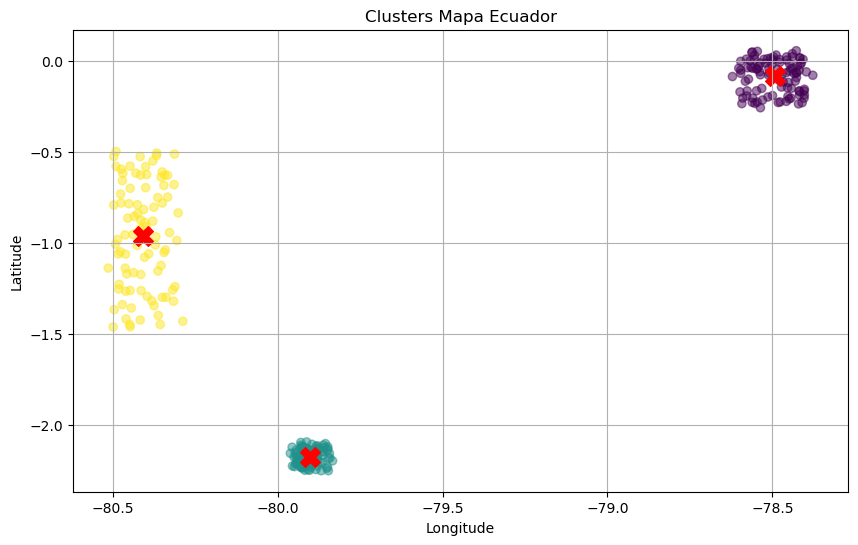

In [420]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['Longitude'], df2['Latitude'], c=df2['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)  # Centroides
plt.title('Clusters Mapa Ecuador')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [428]:
import folium
ecuador_center = [-1.831239, -78.183406]
mapa_ecuador = folium.Map(location=ecuador_center, zoom_start=6)
cluster_colors = {0: 'blue', 1: 'green', 2: 'red'}
centroides = kmeans.cluster_centers_
for i, centroide in enumerate(centroides):
    folium.Marker(
        location=[centroide[1], centroide[0]],
        popup=f"Cluster {i} Centroide",
        icon=folium.Icon(color=cluster_colors.get(i, 'gray'))
    ).add_to(mapa_ecuador)
mapa_ecuador

In [427]:
if len(df2) == 287:
    clusters_output = pd.DataFrame({
        'location_id': range(len(df2)),
        'cluster_label': df2['cluster']
    })

    clusters_output.to_csv('clusters.txt', sep=' ', index=False, header=False)
    print("Archivo 'clusters.txt' generado exitosamente.")
else:
    print(f"El DataFrame no tiene 287 filas, tiene {len(df2)} filas.")

Archivo 'clusters.txt' generado exitosamente.
